# Analiza Pokemonów

## To do
1. Na podstawie inormacji zawartych w DB wyciągnąć wnioski na temat tego jakie pokemony można stworzyć w następnej generacji.
2. konwersja statystyk do Pokemon Go
3. Pokazanie statystyk pokemona i jak imają się do typów[pokazać to na jednej strone z wieloma grafami] pokazać średnią i odstające wyniki. Czy typ ma znaczenie na statystyki
4. to samo co 3 pkcie ale tu z dwoma typami 
5. pokazać czy typ pokemona ma znaczenie na % danej płci, i ogólnikowe wystepowanie danej płci wszsytkich pokemonów ile pokemonów nie ma płci
6. pokazać co ma znaczenie przy zdobywaniu doświadzczenia
7. czy typ pokemona ma znaczenia na jego wzrost i wagę
8. pokazać co ma znaczenie przy łapaniu pokemona
9. pokazać jakie pokemony powstały i ile ich jest na podstawie typu i jakie potencjalne legendarne pokemony można stworzyć w przyszych generacjach
10. pokazać różnicę w statystykach gier pokemon z pokemon go
11. pokazać słabe i mocne strony każdego typu  
12. na podstawie wagi wzrostu i typu sprawdzić korelacje miedzy danymi 

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure as fig
from matplotlib import colorbar as cb
import seaborn as sns
import scipy as sc
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

### Wczytanie bazy danych

In [314]:
PokemonDB = pd.read_csv(r'PokemonDB_updated.csv')

### Random state na podstawie numeru w pokedesie

In [315]:
rs = PokemonDB[PokemonDB['name'] == 'Pikachu']['pokedex_number'].values[0]

### Informacje na temat PokemonDB

In [327]:
PokemonDB.head()

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


### Wczytanie bazy danych typing_chart.csv i wypełnienie pustych komórek jedynkami

In [317]:
TypingChart = pd.read_csv(r'Typing_Chart.csv',index_col=0)
TypingChart = TypingChart.fillna(1)

### TypingChart to tablica w której są zapisane słąbości i mocne strony każdego z typów

In [318]:
TypingChart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Normal to Fairy
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Normal    18 non-null     float64
 1   Fire      18 non-null     float64
 2   Water     18 non-null     float64
 3   Electric  18 non-null     float64
 4   Grass     18 non-null     float64
 5   Ice       18 non-null     float64
 6   Fighting  18 non-null     float64
 7   Poison    18 non-null     float64
 8   Ground    18 non-null     float64
 9   Flying    18 non-null     float64
 10  Psychic   18 non-null     float64
 11  Bug       18 non-null     float64
 12  Rock      18 non-null     float64
 13  Ghost     18 non-null     float64
 14  Dragon    18 non-null     float64
 15  Dark      18 non-null     float64
 16  Steel     18 non-null     float64
 17  Fairy     18 non-null     float64
dtypes: float64(18)
memory usage: 2.7+ KB


In [319]:
type1_only = PokemonDB[PokemonDB['type2'].isna()]

# Liczba Pokémonów tylko z jednym typem
type1_only_counts = type1_only['type1'].value_counts().reset_index()
type1_only_counts.columns = ['type1', 'count']
print("Liczba Pokémonów z type1 bez type2:")
print(type1_only_counts)

Liczba Pokémonów z type1 bez type2:
       type1  count
0     Normal     61
1      Water     61
2      Grass     37
3    Psychic     35
4       Fire     27
5   Electric     26
6   Fighting     22
7        Bug     18
8      Fairy     16
9     Poison     13
10    Dragon     12
11       Ice     12
12      Rock     11
13    Ground     10
14      Dark      9
15     Ghost      9
16     Steel      4
17    Flying      1


In [320]:
type1_and_type2 = PokemonDB[PokemonDB['type2'].notna()]

# Liczba Pokémonów tylko z typem pierwszym i drugim
type_combination_counts = type1_and_type2.groupby(['type1', 'type2']).size().reset_index(name='count')
print("\nLiczba Pokémonów z type1 i type2:")
print(type_combination_counts)


Liczba Pokémonów z type1 i type2:
     type1     type2  count
0      Bug  Electric      4
1      Bug     Fairy      2
2      Bug  Fighting      3
3      Bug      Fire      2
4      Bug    Flying     13
..     ...       ...    ...
143  Water       Ice      3
144  Water    Poison      3
145  Water   Psychic      5
146  Water      Rock      4
147  Water     Steel      1

[148 rows x 3 columns]


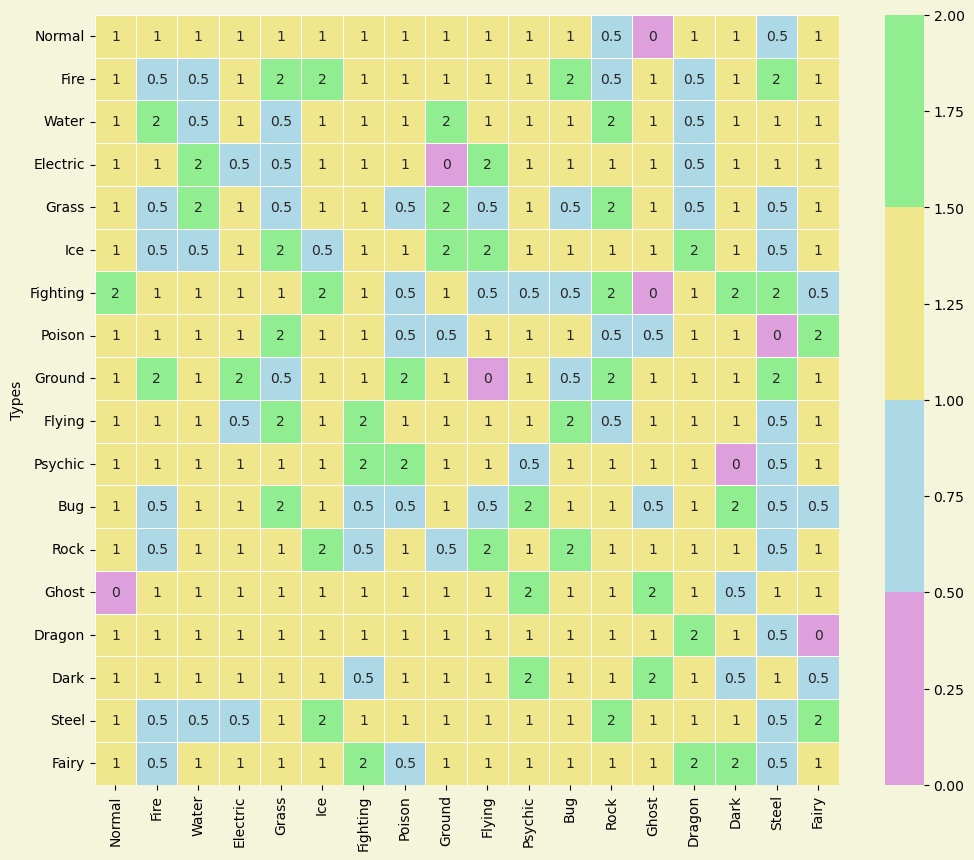

In [321]:
colors = ['plum','lightblue','khaki', 'lightgreen']

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(TypingChart ,annot= True, cmap=colors ,linewidths=.5,center=True)
fig.patch.set_facecolor('beige')

In [326]:
weightsDB = PokemonDB.loc[:,["pokedex_number","type1","type2","weight_kg"]]
weightsDB['weight_kg'] = pd.to_numeric(weightsDB["weight_kg"])
weightsDB.to_csv(r'WeightsDB.csv')

weightsDB

,pokedex_number,type1,type2,weight_kg
0,1,Grass,Poison,6.9
1,2,Grass,Poison,13.0
2,3,Grass,Poison,100.0
3,4,Fire,NaN,8.5
4,5,Fire,NaN,19.0
...,...,...,...,...
796,797,Steel,Flying,999.9
797,798,Grass,Steel,0.1
798,799,Dark,Dragon,888.0
799,800,Psychic,NaN,230.0


In [323]:
weightsDB.sample()

,pokedex_number,type1,type2,weight_kg
645,646,Dragon,Ice,325.0


In [324]:
two_typesdb = PokemonDB.dropna(subset=['type2'])
two_typesdb.to_csv(r'Two_typesDB.csv')

count = two_typesdb['pokedex_number'].count()

print(f'Pokemonów z dwoma typami w 7 generacjach jest łącznie {count}')
two_typesdb.sample(5,random_state=rs)

Pokemonów z dwoma typami w 7 generacjach jest łącznie 417


,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
39,40,Wigglytuff,1,Normal,Fairy,Balloon Pokémon,0,70,85,45,...,0.0,1.00,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
138,139,Omastar,1,Rock,Water,Spiral Pokémon,0,60,115,125,...,1.0,4.00,2.0,0.5,0.5,0.5,1.0,1.0,1.0,1.0
187,188,Skiploom,2,Grass,Flying,Cottonweed Pokémon,0,45,45,50,...,1.0,0.25,0.0,4.0,1.0,2.0,1.0,2.0,1.0,0.5
767,768,Golisopod,7,Bug,Water,Hard Scale Pokémon,0,125,60,140,...,1.0,1.00,0.5,0.5,1.0,1.0,1.0,2.0,0.5,0.5
585,586,Sawsbuck,5,Normal,Grass,Season Pokémon,0,100,60,70,...,0.0,0.50,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


In [325]:
one_typedb = PokemonDB[PokemonDB['type2'].isna()].fillna('')
one_typedb.to_csv(r'One_typeDB.csv')

count = one_typedb['pokedex_number'].count()

print(f'Pokemonów z jednym typem w 7 generacjach jest łącznie {count}')
one_typedb.sample(5,random_state=rs)

Pokemonów z jednym typem w 7 generacjach jest łącznie 384


,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
711,712,Bergmite,6,Ice,,Ice Chunk Pokémon,0,69,32,85,...,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0
670,671,Florges,6,Fairy,,Garden Pokémon,0,65,112,68,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
613,614,Beartic,5,Ice,,Freezing Pokémon,0,130,70,80,...,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0
761,762,Steenee,7,Grass,,Fruit Pokémon,0,40,40,48,...,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5
357,358,Chimecho,3,Psychic,,Wind Chime Pokémon,0,50,95,80,...,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
